### Предобработка 

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

math = pd.read_csv('stud_math.csv')


### Обзорная информация о наборе данных

In [2]:
math.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
display(math.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

In [4]:
#Многие колонки имеют трудночитаемые имена, есть предполагаемые дубликаты в наименованиях
#Выборочно заменяем названия колонок на более удобные для чтения

math = math.rename(columns={'famsize': 'fam_size', 'Pstatus': 'par_status', 'Medu': 'm_edu', 'Fedu': 'f_edu', 
                            'Mjob': 'm_job', 'Fjob':'f_job', 'traveltime': 'travel_time', 'studytime': 'study_time',
                            'schoolsup': 'school_sup', 'famsup': 'fam_sup', 'studytime, granular': 'study_time_doub',
                            'famrel': 'fam_rel', 'freetime': 'free_time', 'goout': 'go_out'})

In [5]:
#Проверяем переименование
display(math.info())

#Выводим описание файла
print(f'Набор данных содержит {math.shape[1]} колонок и {math.shape[0]} строк.')
print(f'В наборе данных {math.isnull().any().sum()} колонок с пропущенными значениями.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           395 non-null    object 
 1   sex              395 non-null    object 
 2   age              395 non-null    int64  
 3   address          378 non-null    object 
 4   fam_size         368 non-null    object 
 5   par_status       350 non-null    object 
 6   m_edu            392 non-null    float64
 7   f_edu            371 non-null    float64
 8   m_job            376 non-null    object 
 9   f_job            359 non-null    object 
 10  reason           378 non-null    object 
 11  guardian         364 non-null    object 
 12  travel_time      367 non-null    float64
 13  study_time       388 non-null    float64
 14  failures         373 non-null    float64
 15  school_sup       386 non-null    object 
 16  fam_sup          356 non-null    object 
 17  paid            

None

Набор данных содержит 30 колонок и 395 строк.
В наборе данных 27 колонок с пропущенными значениями.


In [6]:
#Проверяем, есть ли колонки только с одним уникальным значением

one_value_cols = [col for col in math.columns if math[col].nunique() <= 1]
print(f'Набор данных содержит {len(one_value_cols)} колонок с одним уникальным значением.')

Набор данных содержит 0 колонок с одним уникальным значением.


<h2 id="data_wrangling">Первичный анализ</h2>

<p>Сначала исследуем столбец, относительно которого будет строиться гипотеза.</p>


<p><b>Столбец SCORE (Оценка)</b>
<p>Этот столбец представляет особенный интерес, поскольку содержит данные об оценках, относительно которых нужно будет построить предиктивную модель. Поэтому его мы рассматриваем первым.</p>
<p>Из описания файла выше видно, что в столбце есть 6 пропущенных значений. Необходимо посмотреть, какие конкретные значения есть в столбце, чтобы исключить другие потенциальные ошибки заполнения.</p>

In [7]:
#Просматриваем уникальные значения столбца
display(math.score.unique())

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

<p>Пропущенные значения составляют не более 1.5% от общего массива данных. У нас нет оснований, которые позволят заполнить эти данные. Мы удаляем строки со значением NaN, поскольку они не содержат достаточных для дальнейшей работы данных.</p>

In [8]:
#Создаем новый рабочий датасет, в котором будут удалены оценки зо значением NaN
math_score = math.dropna(subset=['score'])

#Убеждаемся в том, что столбец SCORE больше не содержит NaN
display(math_score.score.unique())

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  20.])

<p>Мы видим, что значения столбца имеют тип float, при этом фактически являются не дробями, а целыми числами. Поэтому для удобства обработки точку можно удалить.</p>

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

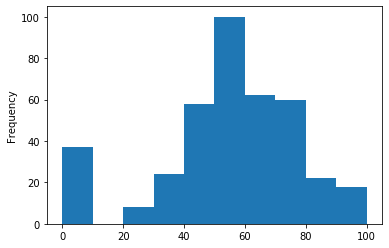

In [10]:
#Проверим распределение признака
math_score.score.plot(kind = 'hist')
math_score.score.describe()

<p>Данные с нулевой оценкой выглядят как потенциальный выброс. Однако, поскольку нам неизвестны условия тестирования (при каких условиях получают балл 20, оценивается ли неявка или сдача чистого листа на тестировании как 0) и на получение значимой нулевой оценки также могут влиять условия жизни, мы оставляем все оценки 0 в датасете.</p>

# Анализ числовых переменных

<p><b>Столбец AGE (Возраст)</b>
<p>Как мы убедились ранее, пустых строк в этой колонке нет.</p>

In [11]:
#Просматриваем уникальные значения столбца
display(math_score.age.unique())

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

<p>Каких-либо ошибочных значений в этой колонке также нет.<p/>
<p>Смотрим на распределение данных.<p/>

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

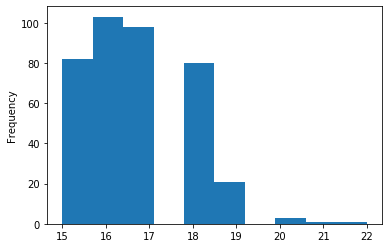

In [12]:
#Проверим распределение признака
math_score.age.plot(kind = 'hist')
math_score.age.describe()

<p>Мы видим выброс в виде предельно малого количества учащихся в возрасте от 20 до 22 лет.
Эту возрастную группу можно удалить из датасета, поскольку она не имеет большого влияния.</p>

In [13]:
#Удаляем строки с возрастом свыше 19 лет

math_score = math_score.drop(math_score[math_score.age > 19].index)
display(pd.DataFrame(math_score.age.value_counts()))


,age
16,103
17,98
15,82
18,80
19,21


<p><b>Столбец FAILURES (Количество внеучебных задач)</b>

In [16]:
#Анализируем значения столбца

math_score.failures.value_counts(dropna=False, normalize=True)


0.0    0.752604
1.0    0.125000
NaN    0.057292
2.0    0.033854
3.0    0.031250
Name: failures, dtype: float64

<p><b>Вывод:</b>
<p>Столбец содержит 75% нулевых значений и 5% пропущенных, т.о. только 20% данных являются значимыми, поэтому параметр FAILURES не будет отобран для построения модели.</p>

<p><b>Столбец ABSENCES (Отсутствие)</b>

In [17]:
#Анализируем значения столбца

math_score.absences.value_counts(dropna=False, normalize=True)

0.0      0.283854
2.0      0.156250
4.0      0.132812
6.0      0.078125
8.0      0.052083
10.0     0.044271
12.0     0.031250
14.0     0.031250
NaN      0.028646
16.0     0.015625
3.0      0.015625
7.0      0.015625
5.0      0.013021
18.0     0.013021
20.0     0.010417
1.0      0.007812
22.0     0.007812
9.0      0.007812
15.0     0.005208
13.0     0.005208
11.0     0.005208
54.0     0.002604
25.0     0.002604
385.0    0.002604
26.0     0.002604
56.0     0.002604
17.0     0.002604
28.0     0.002604
21.0     0.002604
75.0     0.002604
30.0     0.002604
19.0     0.002604
38.0     0.002604
40.0     0.002604
23.0     0.002604
24.0     0.002604
Name: absences, dtype: float64

<p>Поскольку значение NaN содержится в 2% данных, мы можем заменить их на нуль.</p>

In [18]:
#Заменяем NaN на нуль
math_score['absences'] = math_score['absences'].fillna(0)
math_score.absences.value_counts(dropna=False, normalize=True).head()


0.0    0.312500
2.0    0.156250
4.0    0.132812
6.0    0.078125
8.0    0.052083
Name: absences, dtype: float64

count    384.000000
mean       6.593750
std       20.980199
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

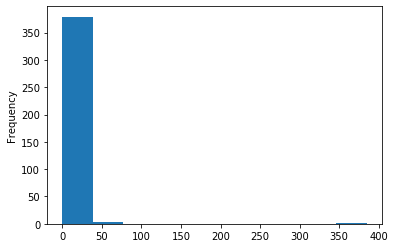

In [19]:
#Проверим распределение признака
math_score.absences.plot(kind = 'hist')
math_score.absences.describe()

<p>Очень высокое стандартное отклонение говорит о наличии выбросов, которые нужно отфильтровать.</p>

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


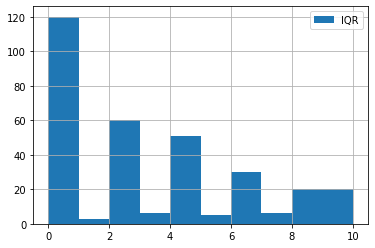

In [20]:
median = math_score.absences.median()
IQR = math_score.absences.quantile(0.75) - math_score.absences.quantile(0.25)
perc25 = math_score.absences.quantile(0.25)
perc75 = math_score.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
math_score.absences.loc[math_score.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

count    368.000000
mean       4.459239
std        4.961264
min        0.000000
25%        0.000000
50%        3.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

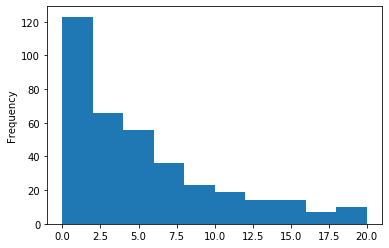

In [21]:
#Фильтруем выбросы
math_score = math_score.loc[math_score.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
math_score.absences.plot(kind = 'hist')
math_score.absences.describe()


<p>Примерно одна треть учеников не пропускала занятия, однако остальные пропускали, что могло сказаться на оценках. Поэтому на текущем этапе мы оставляем эти данные для дальнейшего исследования.</p>

<p>Далее мы просмотрим столбцы, которые имеют унифицированные численные значения - то есть оценивают определенный признак по шкале от 0 до 4 или подобной.</p>


<p><b>Столбец M_EDU (Образование матери)</b>

In [22]:
#Анализируем значения столбца
math_score.m_edu.value_counts(dropna=False, normalize=True)

4.0    0.334239
2.0    0.260870
3.0    0.239130
1.0    0.149457
0.0    0.008152
NaN    0.008152
Name: m_edu, dtype: float64

<p>Есть небольшое количество пропущенных значений, которые мы не можем пока интерпретировать. Заменяем их на нуль.</p>

In [23]:
#Заменяем пропущенные значения на нуль
math_score['m_edu'] = math_score['m_edu'].fillna(0)
math_score.m_edu.value_counts(dropna=False, normalize=True).head()

4.0    0.334239
2.0    0.260870
3.0    0.239130
1.0    0.149457
0.0    0.016304
Name: m_edu, dtype: float64

count    368.000000
mean       2.725543
std        1.125963
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64

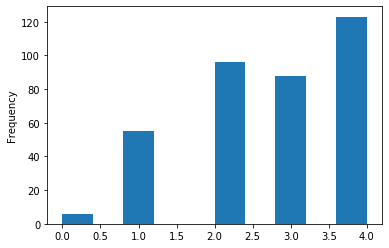

In [24]:
#Проверим распределение признака
math_score.m_edu.plot(kind = 'hist')
math_score.m_edu.describe()

<p>Признак распределен нормально, только небольшое количество женщин не имеет никакого образования.</p>

<p><b>Столбец F_EDU (Образование отца)</b>

In [25]:
#Анализируем значения столбца
math_score.f_edu.value_counts(dropna=False, normalize=True)

2.0     0.266304
3.0     0.236413
4.0     0.228261
1.0     0.198370
NaN     0.062500
0.0     0.005435
40.0    0.002717
Name: f_edu, dtype: float64

<p>Есть пропущенные значения (6%) и ошибочные данные - вместо 40 явно должно быть 4. Необходимо произвести замену.</p>

In [26]:
#Заменяем пропущенные значения на нуль
math_score['f_edu'] = math_score['f_edu'].fillna(0)

#Заменяем 40 на 4
math_score.f_edu = math_score.f_edu.replace(40, 4)
math_score.f_edu.value_counts(dropna=False, normalize=True)

2.0    0.266304
3.0    0.236413
4.0    0.230978
1.0    0.198370
0.0    0.067935
Name: f_edu, dtype: float64

count    368.000000
mean       2.364130
std        1.225531
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: f_edu, dtype: float64

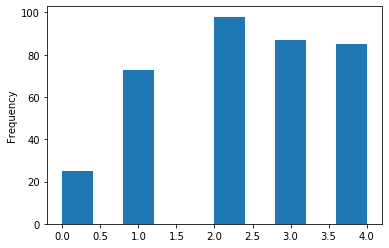

In [27]:
#Проверим распределение признака
math_score.f_edu.plot(kind = 'hist')
math_score.f_edu.describe()

<p>Признак распределен нормально, выбросов нет.</p>

<p><b>Столбец TRAVEL_TIME (Время в пути)</b>

In [28]:
#Анализируем значения столбца
math_score.travel_time.value_counts(dropna=True, normalize=True)


1.0    0.667647
2.0    0.250000
3.0    0.061765
4.0    0.020588
Name: travel_time, dtype: float64

<p>Мы никак не cможем в дальнейшем интерпретировать пропущенные данные, которых здесь 7%, поэтому уберем строки с NaN.</p>

In [119]:
math_score.travel_time.dropna()
math_score.travel_time

0      2.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
388    1.0
389    NaN
391    2.0
393    3.0
394    1.0
Name: travel_time, Length: 368, dtype: float64

count    340.000000
mean       1.435294
std        0.703083
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: travel_time, dtype: float64

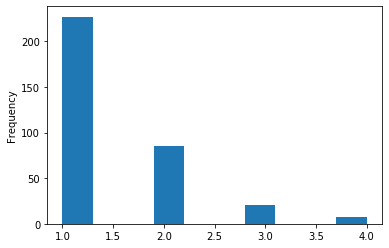

In [30]:
#Проверим распределение признака
math_score.travel_time.plot(kind = 'hist')
math_score.travel_time.describe()


<p>Признак распределен нормально, выбросов нет. Большинство учащихся живет рядом со школой, что понятно с точки зрения здравого смысла. Поэтому мы не будем учитывать этот параметр при дальнейшем анализе. </p>

<p><b>Столбец STUDY_TIME (Время на учебу)</b>

In [31]:
#Анализируем значения столбца
math_score.study_time.value_counts(dropna=True, normalize=True)

2.0    0.493075
1.0    0.265928
3.0    0.166205
4.0    0.074792
Name: study_time, dtype: float64

<p>Пропущенных значений нет. Проверяем распределение признака.</p>

count    361.000000
mean       2.049861
std        0.854892
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: study_time, dtype: float64

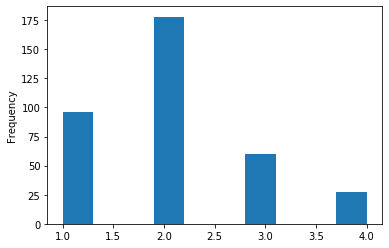

In [32]:
math_score.study_time.plot(kind = 'hist')
math_score.study_time.describe()

<p>Признак распределен нормально, выбросов нет. Большинство учащихся тратит менее 2-х часов на учебу, что опять-таки понятно. Поэтому мы не будем учитывать этот параметр при дальнейшем анализе.</p>

<p><b>Столбец FAM_REL (Семейные отношения)</b>

In [33]:
#Анализируем значения столбца
math_score.fam_rel.value_counts(dropna=True, normalize=True)

 4.0    0.497076
 5.0    0.263158
 3.0    0.169591
 2.0    0.046784
 1.0    0.020468
-1.0    0.002924
Name: fam_rel, dtype: float64

<p>Имеется ошибочное значение (- 1), заменяем его на 1.</p>

In [34]:
math_score.fam_rel = math_score.fam_rel.replace(- 1, 1)

count    361.000000
mean       2.049861
std        0.854892
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: study_time, dtype: float64

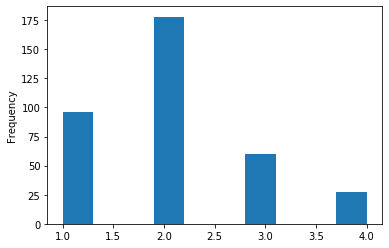

In [35]:
math_score.study_time.plot(kind = 'hist')
math_score.study_time.describe()

<p>Признак распределен нормально, выбросов нет. Большинство учащихся, к сожалению, состоит не в самых лучших отношениях с родителями. Поэтому мы также не будем учитывать этот параметр при дальнейшем анализе.</p>

<p><b>Столбец FREE_TIME (Свободное время)</b>

In [36]:
#Анализируем значения столбца
math_score.free_time.value_counts(dropna=True, normalize=True)

3.0    0.407202
4.0    0.293629
2.0    0.163435
5.0    0.094183
1.0    0.041551
Name: free_time, dtype: float64

<p>Нет пропусков и странных значений, можно сразу визуализировать распределение.</p>

count    361.000000
mean       3.235457
std        0.973234
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: free_time, dtype: float64

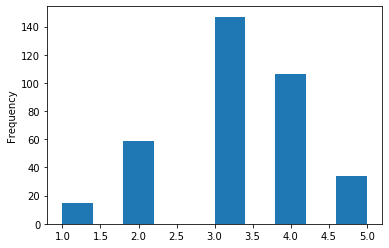

In [37]:
math_score.free_time.plot(kind = 'hist')
math_score.free_time.describe()

<p>Признак имеет нормальное распределение, нет выбросов. На текущий момент нет причин исключать его из рассмотрения.</p>

<p><b>Столбец GO_OUT (Время с друзьями)</b>

In [38]:
#Анализируем значения столбца
math_score.go_out.value_counts(dropna=True, normalize=True)

3.0    0.329640
2.0    0.268698
4.0    0.210526
5.0    0.132964
1.0    0.058172
Name: go_out, dtype: float64

count    361.000000
mean       3.091413
std        1.113033
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: go_out, dtype: float64

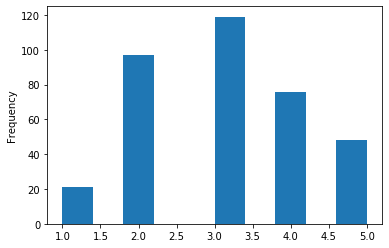

In [39]:
math_score.go_out.plot(kind = 'hist')
math_score.go_out.describe()

<p>Хотя распределение данных внутри этого столбца не полностью повторяет то, что мы видели во FREE_TIME, по смыслу значения этих столбцов пересекаются. Поэтому столбец GO_OUT можно исключить из дальнейшего рассмотрения.</p>

<p><b>Столбец HEALTH (Здоровье)</b>

In [40]:
#Анализируем значения столбца
math_score.health.value_counts(dropna=True, normalize=True)

5.0    0.371105
3.0    0.232295
4.0    0.164306
1.0    0.121813
2.0    0.110482
Name: health, dtype: float64

count    353.000000
mean       3.552408
std        1.395285
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

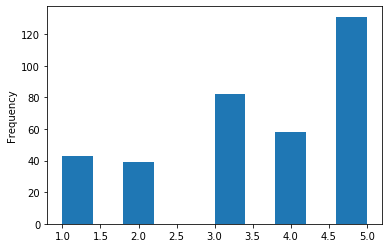

In [41]:
math_score.health.plot(kind = 'hist')
math_score.health.describe()

<p>Признак распределен нормально, выбросов нет. На текущий момент нет причин исключать его из рассмотрения.</p>

<p><b>Столбец STUDY_TIME_DOUB (характер информации не ясен)</b>

In [118]:
#Анализируем значения столбца
display(math_score.study_time_doub.value_counts(dropna=True, normalize=True))
display(math_score.loc[:, ['study_time_doub']].info())

-6.0     0.493075
-3.0     0.265928
-9.0     0.166205
-12.0    0.074792
Name: study_time_doub, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   study_time_doub  361 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


None

In [120]:
#Заменяем пропущенные значения на нуль
math_score['study_time_doub'] = math_score['study_time_doub'].fillna(0)

In [121]:
#Проверяем новые значения столбца
math_score.study_time_doub.value_counts(dropna=True, normalize=True)

-6.0     0.483696
-3.0     0.260870
-9.0     0.163043
-12.0    0.073370
 0.0     0.019022
Name: study_time_doub, dtype: float64

count    368.000000
mean      -6.032609
std        2.675761
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max        0.000000
Name: study_time_doub, dtype: float64

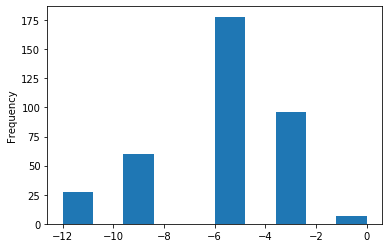

In [123]:
#Проверяем распределение признака
math_score.study_time_doub.plot(kind = 'hist')
math_score.study_time_doub.describe()

<p>Признак распределен нормально, выбросов нет. На текущий момент нет причин исключать его из рассмотрения.</p>

# Анализ номинативных переменных

<p><b>Столбец SCHOOL (школа)</b>

In [42]:
#Анализируем значения столбца
display(pd.DataFrame(math_score.school.value_counts()))
print("Уникальных значений:", math_score.school.nunique())
math_score.loc[:, ['school']].info()

,school
GP,326
MS,42


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  368 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


<p>Учащиеся посещали два типа школ, подавляющее большинство - GP. Пропусков и ошибочных значений нет.</p>

<p><b>Столбец SEX (пол)</b>

In [43]:
#Анализируем значения столбца
display(pd.DataFrame(math_score.sex.value_counts()))
print("Уникальных значений:", math_score.sex.nunique())
math_score.loc[:, ['sex']].info()

,sex
F,190
M,178


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     368 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


<p>Пол учащихся распределен примерно в равных долях, небольшое преимущество имеют ученицы. Пропусков и ошибочных значений нет.</p>

<p><b>Столбец ADDRESS (адрес)</b>

In [197]:
#Анализируем значения столбца и заменяем отсутствующие значения на None
math_score.address = math_score.address.astype(str).apply(lambda x : None if pd.isnull(x)
   else None if str.lower(x) == 'nan'
   else None if x.strip == ''
   else x.strip())
display(pd.DataFrame(math_score.address.value_counts()))
print("Уникальных значений:", math_score.address.nunique())
math_score.loc[:, ['address']].info()

,address
U,274
R,80
None,14


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  368 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


<p><b>Столбец FAM_SIZE (размер семьи)</b>

In [198]:
#Анализируем значения столбца и заменяем отсутствующие значения на None
math_score.fam_size = math_score.fam_size.astype(str).apply(lambda x : None if pd.isnull(x)
   else None if str.lower(x) == 'nan'
   else None if x.strip == ''
   else x.strip())
display(pd.DataFrame(math_score.fam_size.value_counts()))
print("Уникальных значений:", math_score.fam_size.nunique())
math_score.loc[:, ['fam_size']].info()

,fam_size
GT3,239
LE3,104
None,25


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fam_size  368 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


<p> В этом столбце имеются отсутствующиe значения, заменим их на None. </p>

<p><b>Столбец PAR_STATUS (размер семьи)</b>

In [199]:
#Анализируем значения столбца и заменяем отсутствующие значения на None
math_score.par_status = math_score.par_status.astype(str).apply(lambda x : None if pd.isnull(x)
   else None if str.lower(x) == 'nan'
   else None if x.strip == ''
   else x.strip())
display(pd.DataFrame(math_score.par_status.value_counts()))
print("Уникальных значений:", math_score.par_status.nunique())
math_score.loc[:, ['par_status']].info()

,par_status
T,297
None,40
A,31


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   par_status  368 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


<p><b>Столбец M_JOB (работа матери)</b>

In [200]:
#Анализируем значения столбца и заменяем отсутствующие значения на None
math_score.par_status = math_score.par_status.astype(str).apply(lambda x : None if pd.isnull(x)
   else None if str.lower(x) == 'nan'
   else None if x.strip == ''
   else x.strip())
display(pd.DataFrame(math_score.m_job.value_counts()))
print("Уникальных значений:", math_score.m_job.nunique())
math_score.loc[:, ['m_job']].info()

,m_job
other,120
services,89
at_home,57
teacher,54
health,31
None,17


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   368 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


<p> 36% (32% - other и 4% - None) не дает нам никакой специфицированной информации о профессии матерей, то же самое касается значения at_home (15%) - домохозяйки, не имеющие конкретных профессиональных навыков. По этой причине данный столбец нельзя считать информативным и стоит исключить из дальнейшего рассмотрения.</p>

<p><b>Столбец F_JOB (работа отца)</b>

In [201]:
#Анализируем значения столбца 
display(pd.DataFrame(math_score.f_job.value_counts()))
print("Уникальных значений:", math_score.f_job.nunique())
math_score.loc[:, ['f_job']].info()

,f_job
other,184
services,91
teacher,27
at_home,16
health,15


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   333 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


In [75]:
math_score.f_job.value_counts(dropna=True, normalize=True)

other       0.552553
services    0.273273
teacher     0.081081
at_home     0.048048
health      0.045045
Name: f_job, dtype: float64

<p>Здесь мы также сразу видим, что большая часть информации (55%) приходится на неспецифированные виды работы и пропуски. Таким образом, этот столбец также нельзя считать содержательным и принимать во внимание при дальнейшем анализе.</p> 

<p><b>Столбец REASON (причина выбора школы)</b>

In [202]:
#Анализируем значения столбца и заменяем отсутствующие значения на None
math_score.reason = math_score.reason.astype(str).apply(lambda x : None if pd.isnull(x)
   else None if str.lower(x) == 'nan'
   else None if x.strip == ''
   else x.strip())
display(pd.DataFrame(math_score.reason.value_counts()))
print("Уникальных значений:", math_score.reason.nunique())
math_score.loc[:, ['reason']].info()

,reason
course,130
reputation,97
home,92
other,32
None,17


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  368 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


<p><b>Столбец GUARDIAN (опекун)</b>

In [56]:
#Анализируем значения столбца
display(pd.DataFrame(math_score.guardian.value_counts()))
print("Уникальных значений:", math_score.guardian.nunique())
math_score.loc[:, ['guardian']].info()

,guardian
mother,235
father,85
other,20


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  340 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


<p>В подавляющем большеинстве случаев опекуном является мать, поэтому эти данные не влияют на интересующий нас фактор.</p>

<p><b>Столбец SCHOOL_SUP (дополнительная образовательная поддержка)</b>

In [58]:
#Анализируем значения столбца
display(pd.DataFrame(math_score.school_sup.value_counts()))
print("Уникальных значений:", math_score.school_sup.nunique())
math_score.loc[:, ['school_sup']].info()

,school_sup
no,314
yes,46


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school_sup  360 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


<p>Подавляющее большинство учеников не имели дополнительной образовательной поддержки, имеющиеся пропуски также не дают дополнительной информации. Поэтому этот столбец можно исключить из дальнейшего рассмотрения.</p>

<p><b>Столбец FAM_SUP (семейная образовательная поддержка)</b>

In [203]:
#Анализируем значения столбца и заменяем отсутствующие значения на None
math_score.fam_sup = math_score.fam_sup.astype(str).apply(lambda x : None if pd.isnull(x)
   else None if str.lower(x) == 'nan'
   else None if x.strip == ''
   else x.strip())
display(pd.DataFrame(math_score.fam_sup.value_counts()))
print("Уникальных значений:", math_score.fam_sup.nunique())
math_score.loc[:, ['fam_sup']].info()

,fam_sup
yes,206
no,128
None,34


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fam_sup  368 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


<p><b>Столбец PAID (платные занятия)</b>

In [204]:
#Анализируем значения столбца и заменяем отсутствующие значения на None
math_score.paid = math_score.paid.astype(str).apply(lambda x : None if pd.isnull(x)
   else None if str.lower(x) == 'nan'
   else None if x.strip == ''
   else x.strip())
math_score.paid.value_counts(dropna=True, normalize=True)
display(pd.DataFrame(math_score.paid.value_counts()))
print("Уникальных значений:", math_score.paid.nunique())
math_score.loc[:, ['paid']].info()

,paid
no,188
yes,142
None,38


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    368 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


<p><b>Столбец ACTIVITIES (дополнительные занятия)</b>

In [205]:
#Анализируем значения столбца и заменяем отсутствующие значения на None
math_score.activities = math_score.activities.astype(str).apply(lambda x : None if pd.isnull(x)
   else None if str.lower(x) == 'nan'
   else None if x.strip == ''
   else x.strip())
#Просматриваем изменение данных
math_score.activities.value_counts(dropna=True, normalize=True)
display(pd.DataFrame(math_score.activities.value_counts()))
print("Уникальных значений:", math_score.activities.nunique())
math_score.loc[:, ['activities']].info()

,activities
yes,186
no,168
None,14


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  368 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


<p><b>Столбец NURSERY (дошкольные учреждения)</b>

In [106]:
#Анализируем значения столбца
display(pd.DataFrame(math_score.nursery.value_counts()))
print("Уникальных значений:", math_score.nursery.nunique())
math_score.loc[:, ['nursery']].info()

,nursery
yes,282
no,71


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  353 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


<p>Подавляющее число учеников посещали дошкольные заведения, к этому можно прибавить пропущенные значения которые не дают нам дополнительной информации. По этой причине столбец NURSERY можно исключить из дальнейшего рассмотрения.</p>

<p><b>Столбец HIGHER (планирует высшее образование)</b>

In [107]:
#Анализируем значения столбца
display(pd.DataFrame(math_score.higher.value_counts()))
print("Уникальных значений:", math_score.higher.nunique())
math_score.loc[:, ['higher']].info()

,higher
yes,333
no,17


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  350 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


<p>Подавляющее число учеников планирует получить высшее образование, к этому можно прибавить пропущенные значения которые не дают нам дополнительной информации. По этой причине столбец HIGHER можно исключить из дальнейшего рассмотрения.</p>

<p><b>Столбец INTERNET (наличие интернета)</b>

In [109]:
#Анализируем значения столбца
display(pd.DataFrame(math_score.internet.value_counts()))
print("Уникальных значений:", math_score.internet.nunique())
math_score.loc[:, ['internet']].info()

,internet
yes,283
no,52


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  335 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


<p>У подавляющего числа учеников есть интернет, к этому можно прибавить пропущенные значения которые не дают нам дополнительной информации. По этой причине столбец INTERNET можно исключить из дальнейшего рассмотрения.</p>

<p><b>Столбец ROMANTIC (романтические отношения)</b>

In [ ]:
#Анализируем значения столбца
math_score.romantic.value_counts(dropna=True, normalize=True)


<p>Подавляющее большинство учеников не состоит в романтических отношениях, к ним добавляются те, кто о ком нет информации. По этой причине столбец ROMANTIC можно исключить из дальнейшего рассмотрения.</p>

# Корреляционный анализ числовых переменных

Мы будем анализировать следующие колонки:
<ul>
    <li>age</li>
    <li>m_edu</li>
    <li>f_edu</li>
    <li>free_time</li> 
    <li>health</li>
<ul>

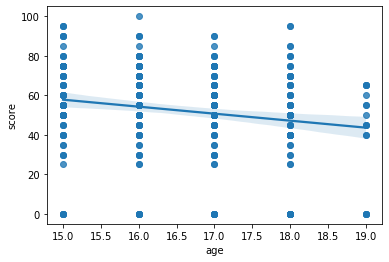

In [164]:
sns.regplot(x='age', y='score', data=math_score)

In [165]:
math_score[['score','age']].corr()

,score,age
score,1.000000,-0.181492
age,-0.181492,1.000000


<p>Мы видим слабо выраженную отрицательную корреляцию между возрастом учащихся и их оценками.</p>

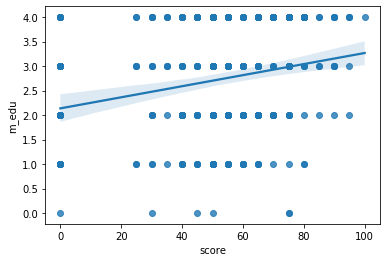

In [147]:
sns.regplot(x='score', y='m_edu', data=math_score)

In [148]:
math_score[['score','m_edu']].corr()

,score,m_edu
score,1.000000,0.231096
m_edu,0.231096,1.000000


<p>Мы видим слабо выраженную положительную корреляцию между образованием матерей и оценками учащихся.</p>

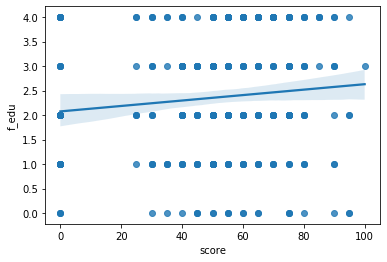

In [150]:
sns.regplot(x='score', y='f_edu', data=math_score)

In [151]:
math_score[['score','f_edu']].corr()

,score,f_edu
score,1.000000,0.104369
f_edu,0.104369,1.000000


<p>Данные демонстрируют слабую корреляцию, поэтому образование отца мы можем исключить.</p>

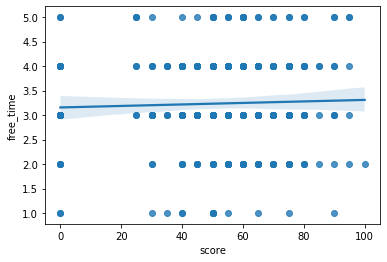

In [153]:
sns.regplot(x='score', y='free_time', data=math_score)

In [160]:
math_score[['score','free_time']].corr()

,score,free_time
score,1.000000,0.036266
free_time,0.036266,1.000000


<p>Данные демонстрируют слабую корреляцию, поэтому фактор свободного времени мы можем исключить.</p>

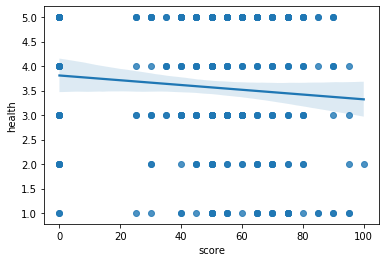

In [156]:
sns.regplot(x='score', y='health', data=math_score)

In [161]:
math_score[['score','health']].corr()

,score,health
score,1.000000,-0.080475
health,-0.080475,1.000000


<p>Данные демонстрируют слабую корреляцию, поэтому здоровье мы можем исключить.</p>

### Промежуточный вывод:
<p>На фоне всех остальных данных возраст учащихся и уровень образования матерей демонстрируют наиболее выраженную корреляцию. Эта модель кажется правдоподобной с точки зрения здравого смысла: матери с более высоким уровнем образования заботятся об учебе своих детей, а у них с возрастом появляется больше других изучаемых предметов или каких-то социальных нагрузок, поэтому уровень оценок падает.</p>

# Корреляционный анализ номинативных переменных

Мы будем анализировать следующие колонки:
<ul>
    <li>school</li>
    <li>sex</li>
    <li>par_status</li>
    <li>reason</li>
    <li>fam_sup</li>
    <li>paid</li>
    <li>activities.</li>
<ul>

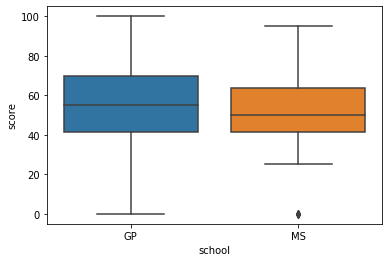

In [169]:
sns.boxplot(x="school", y="score", data=math_score)

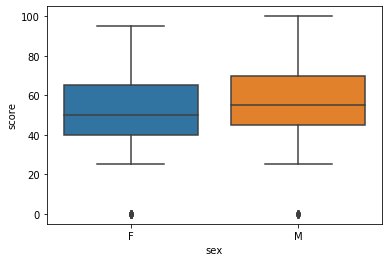

In [177]:
sns.boxplot(x="sex", y="score", data=math_score)

<p>Ученики мужского пола имеют несколько более высокие оценки по математике.</p>

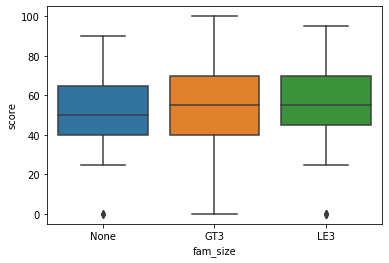

In [178]:
sns.boxplot(x="fam_size", y="score", data=math_score)

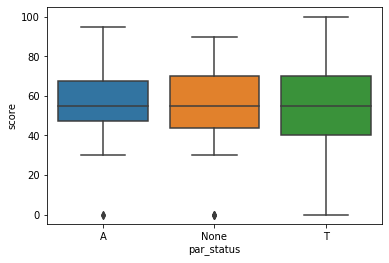

In [179]:
sns.boxplot(x="par_status", y="score", data=math_score)

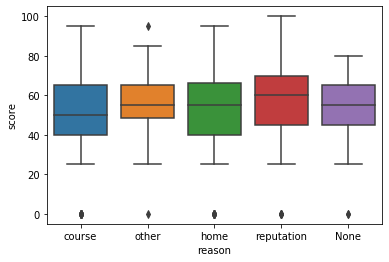

In [180]:
sns.boxplot(x="reason", y="score", data=math_score)

<p>Ученики, выбравшие школу исходя из ее репутации, имеют несколько более высокие оценки, чем все остальные.</p>

<p>Ученики, не имеющие семейной поддержки, имеют чуть более высокие оценки, чем остальные.</p>

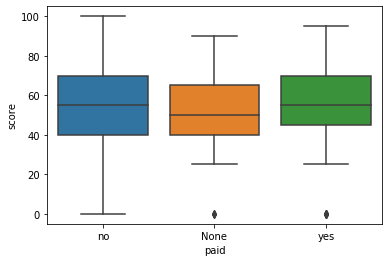

In [190]:
sns.boxplot(x="paid", y="score", data=math_score)

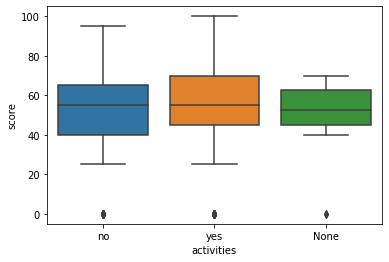

In [191]:
sns.boxplot(x="activities", y="score", data=math_score)

<p>Ученики, посещавшие дополнительные занятия по математике, демонстрируют более высокие оценки.</p>

# Финальный вывод

<p>На оценки по математике влияют следующие факторы:
<ul>
    <li>age</li>
    <li>m_edu</li>
    <li>sex</li> 
    <li>fam_sup</li>
    <li>activities.</li>
<ul>
    

<p>Их мы можем использовать для дальнейшего построения модели. Важно отметить, что исходные данные не всегда отличаются высокой дифференциацией, поэтому мы должны обращать внимание в том числе на небольшие статистические различия. Если попробовать описать модель в обычных терминах, получится, что наивысшие оценки получает ученик мужского пола, которого воспитывает мать с высоким уровнем образования, выбравший школу исходя из ее репутации, посещающий дополнительные занятия по математике, и при этом имеющий высокую собственную мотитвацию к учебе, поскольку семейной поддержки нет (не помогают делать уроки?)</p>